In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
path="C:\\Users\\sriram\\Desktop\\startup.ml\\"

In [32]:
data=pd.read_csv(path+"On_Time_On_Time_Performance_2017_1.zip", encoding='ISO-8859-1', compression='zip')

C:\Users\sriram\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
nrow=data.shape[0]
count=0
print('Type numeric:')
list_feature_Nan = []
complete_Nan=[]
for i in data.select_dtypes(exclude=['object']).columns:
    if (data[i].isnull()).astype(int).sum() > 0:
        percent=((data[i].isnull()).astype(int).sum()/nrow)*100
        print("Feature: ", i, "has",percent , "% of NaN")
        if percent ==100:
            complete_Nan.append(i)
        list_feature_Nan.append(i)
    count+=1

print('Type object:') 

for i in data.select_dtypes(include=['object']).columns:
    if (data[i].isnull()).astype(int).sum() > 0:
        print("Feature: ", i, "has", ((data[i].isnull()).astype(int).sum()/nrow)*100, "% of NaN") 
    count+=1
print (count)

Type numeric:
Feature:  DepTime has 1.89792830049 % of NaN
Feature:  DepDelay has 1.89792830049 % of NaN
Feature:  DepDelayMinutes has 1.89792830049 % of NaN
Feature:  DepDel15 has 1.89792830049 % of NaN
Feature:  DepartureDelayGroups has 1.89792830049 % of NaN
Feature:  TaxiOut has 1.94948190846 % of NaN
Feature:  WheelsOff has 1.94948190846 % of NaN
Feature:  WheelsOn has 2.06014439455 % of NaN
Feature:  TaxiIn has 2.06014439455 % of NaN
Feature:  ArrTime has 2.06014439455 % of NaN
Feature:  ArrDelay has 2.3048018186 % of NaN
Feature:  ArrDelayMinutes has 2.3048018186 % of NaN
Feature:  ArrDel15 has 2.3048018186 % of NaN
Feature:  ArrivalDelayGroups has 2.3048018186 % of NaN
Feature:  CRSElapsedTime has 0.000888855309911 % of NaN
Feature:  ActualElapsedTime has 2.3048018186 % of NaN
Feature:  AirTime has 2.3048018186 % of NaN
Feature:  CarrierDelay has 78.2899312693 % of NaN
Feature:  WeatherDelay has 78.2899312693 % of NaN
Feature:  NASDelay has 78.2899312693 % of NaN
Feature:  Secu

In [34]:
#Removing features with only null values
data.drop(complete_Nan, axis=1, inplace=True)

In [ ]:
data.to_csv(path+"new_data.csv",index=False)

In [ ]:
#Removing rows with null values in Arrival Delay
data=data[data.ArrDelay!=-999]

In [35]:
datacols=['FlightDate']
departureCols=[ 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk']
data.drop(datacols, axis=1, inplace=True)
data.drop(departureCols, axis=1, inplace=True)

In [36]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,...,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum
0,2017,1,1,17,2,AA,19805,AA,N583AA,494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,18,3,AA,19805,AA,N544AA,494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,19,4,AA,19805,AA,N553AA,494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,20,5,AA,19805,AA,N191AA,494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,21,6,AA,19805,AA,N170AA,494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([  4.73222602e-03,   1.49138670e-04,   1.06710617e-05,
          2.43941808e-06,   1.38122302e-06,   8.79972733e-07,
          2.56194593e-07,   1.33666744e-07,   1.11388954e-08,
          2.22777907e-08]),
 array([  -98. ,   106.2,   310.4,   514.6,   718.8,   923. ,  1127.2,
         1331.4,  1535.6,  1739.8,  1944. ]),
 <a list of 10 Patch objects>)

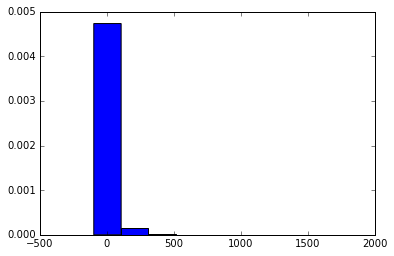

In [63]:
#Histogram of Arrival Delays
plt.hist(data['ArrDelay'],normed=1)

In [54]:
data.shape

(450017, 77)

In [57]:
data=data.dropna(subset=['ArrDelay'])
data.shape

(439645, 77)

In [61]:
data.columns.values

array(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum', 'FlightNum',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips',
       'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
       'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime',
       'TotalAddGTime', 'LongestAddGTime', 'DivAirportLandings',
       'DivReachedDest', 'DivActualElapsedTim

In [67]:
data['WheelsOn']

0         1837.0
1         1815.0
2         1824.0
3         1926.0
4         1854.0
5         1917.0
6         1900.0
7         1858.0
8         1901.0
9         1857.0
10        1839.0
11        1819.0
12        1824.0
13        1832.0
14        1829.0
15        1505.0
16        1456.0
17        1504.0
18        1455.0
19        1508.0
20        1446.0
21        1453.0
22        1504.0
23        1538.0
24        1449.0
25        1444.0
26        1450.0
27        1452.0
28        1451.0
29        1955.0
           ...  
449987    1238.0
449988    1249.0
449989    1221.0
449990    1043.0
449991     929.0
449992    2048.0
449993    1844.0
449994     715.0
449995     743.0
449996    1825.0
449997    1815.0
449998     911.0
449999    1210.0
450000    1740.0
450001     647.0
450002    2045.0
450003    1243.0
450004    1424.0
450005     651.0
450006    1917.0
450007    1750.0
450008     823.0
450009    1824.0
450010    1957.0
450011    1258.0
450012     928.0
450013    1552.0
450014    1603

In [65]:
aggregated

Month
1    6.954484
Name: ArrDelay, dtype: float64